<a href="https://colab.research.google.com/github/surya323-ma/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
df=pd.read_csv("loan_prediction.csv")
print(df.columns)

df.head(10)
df.shape

Saving loan_prediction.csv to loan_prediction.csv
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


(614, 13)

In [11]:
for col in df.columns:
    # Check if the column's data type is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        # Fill missing values with the mean for numeric columns
        df[col] = df[col].fillna(df[col].mean())

print(df.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [14]:
label_encoder = LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col] = label_encoder.fit_transform(df[col])

Visualize Loan Status Distribution

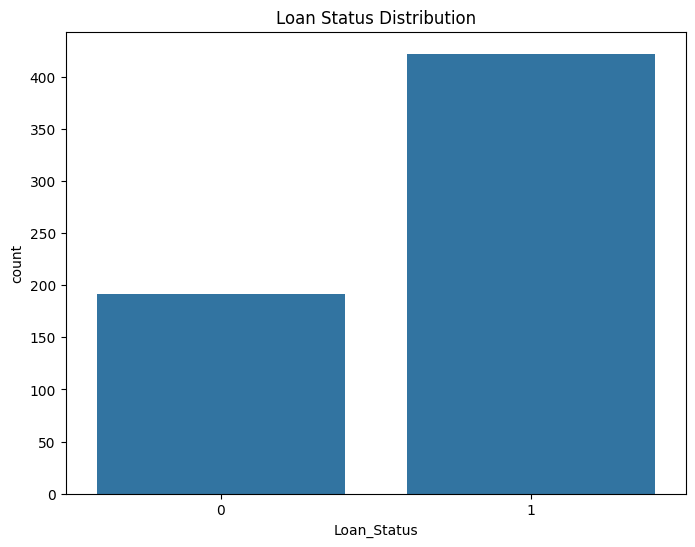

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Status Distribution')
plt.show()

**Correlation** **Heatmap**

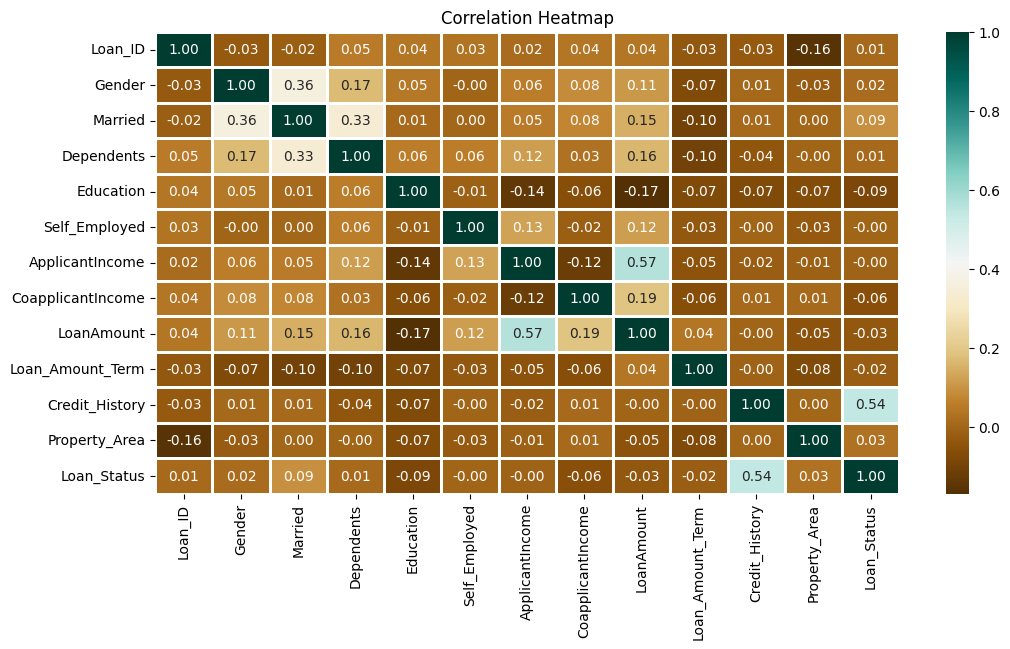

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Split Dataset

In [18]:
X = df.drop(['Loan_Status'], axis=1)
Y = df['Loan_Status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)



Model Initialization

In [19]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC()
lc = LogisticRegression()

In [20]:
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(f"Accuracy score of {clf.__class__.__name__} = {100 * metrics.accuracy_score(Y_test, Y_pred)}")


Accuracy score of RandomForestClassifier = 76.01626016260163
Accuracy score of KNeighborsClassifier = 61.382113821138205
Accuracy score of SVC = 67.07317073170732
Accuracy score of LogisticRegression = 76.01626016260163
